In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('out.csv')
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Artist Genre
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0,['chill abstract hip hop']
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1,"['conscious hip hop', 'hip hop', 'rap', 'west ..."
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0,[]
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0,['pop']
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1,"['detroit hip hop', 'hip hop', 'rap']"


In [3]:
df['Release Date']=pd.to_datetime(df['Release Date'], format = "%m/%d/%Y")

In [4]:
df['Spotify Streams']= df['Spotify Streams'].replace(',','', regex=True)

df['Spotify Streams'] = pd.to_numeric(df['Spotify Streams'].fillna(0), downcast = 'integer', errors='coerce').fillna(0)

strings_to_nums = df[['All Time Rank','Spotify Playlist Count','Spotify Playlist Reach','YouTube Views','YouTube Likes'
                               ,'TikTok Posts','TikTok Likes','TikTok Views','YouTube Playlist Reach','AirPlay Spins','SiriusXM Spins'
                               ,'Deezer Playlist Reach','Pandora Streams','Pandora Track Stations','Soundcloud Streams','Shazam Counts']].fillna(0)
strings_to_nums = strings_to_nums.replace(',','', regex=True)
strings_to_nums = strings_to_nums.apply(pd.to_numeric, args =('coerce','integer')).fillna('0')

df[['All Time Rank','Spotify Playlist Count','Spotify Playlist Reach','YouTube Views','YouTube Likes','TikTok Posts','TikTok Likes'
             ,'TikTok Views','YouTube Playlist Reach','AirPlay Spins','SiriusXM Spins','Deezer Playlist Reach','Pandora Streams','Pandora Track Stations'
             ,'Soundcloud Streams','Shazam Counts']] = strings_to_nums
df[['Spotify Popularity', 'Apple Music Playlist Count', 'Deezer Playlist Count', 'Amazon Playlist Count']] = df[['Spotify Popularity', 'Apple Music Playlist Count', 'Deezer Playlist Count', 'Amazon Playlist Count']].fillna(0).astype(int)

df['Explicit Track']= df['Explicit Track'].astype(bool)


In [5]:
df.dtypes

Track                                 object
Album Name                            object
Artist                                object
Release Date                  datetime64[ns]
ISRC                                  object
All Time Rank                          int16
Track Score                          float64
Spotify Streams                        int64
Spotify Playlist Count                 int32
Spotify Playlist Reach                 int32
Spotify Popularity                     int32
YouTube Views                          int64
YouTube Likes                          int32
TikTok Posts                           int32
TikTok Likes                           int64
TikTok Views                           int64
YouTube Playlist Reach                 int64
Apple Music Playlist Count             int32
AirPlay Spins                          int32
SiriusXM Spins                         int16
Deezer Playlist Count                  int32
Deezer Playlist Reach                  int32
Amazon Pla

In [21]:
import ast
lst = [ast.literal_eval(e) for e in df['Artist Genre']]
df['Artist Genre'] = lst

ValueError: malformed node or string: ['chill abstract hip hop']

In [42]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Artist Genre
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,390470936,30716,196631588,...,62,17598718,114,18004655,22931,4818457,2669262,NaN,False,[chill abstract hip hop]
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,323703884,28113,174597137,...,67,10422430,111,7780028,28444,6623075,1118279,NaN,True,"[conscious hip hop, hip hop, rap, west coast rap]"
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,601309283,54331,211607669,...,136,36321847,172,5022621,5639,7208651,5285340,NaN,False,Not Available
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2031280633,269802,136569078,...,264,24684248,210,190260277,203384,0,11822942,NaN,False,[pop]
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,107034922,7223,151469874,...,82,17660624,105,4493884,7006,207179,457017,NaN,True,"[detroit hip hop, hip hop, rap]"


In [43]:
freq_genre = {'Not Available': 0}

for (idx, val) in enumerate(df['Artist Genre']):
    if val != 'Not Available':
        s = set(val)
        for e in s:
            try:
                freq_genre[e] += 1
            except:
                freq_genre[e] = 0
                freq_genre[e] += 1
    else:
        freq_genre['Not Available'] += 1


sorted_freq_genre = {k: v for k, v in sorted(freq_genre.items(), key=lambda item: item[1], reverse = True)}
print(sorted_freq_genre)

{'pop': 920, 'rap': 677, 'urbano latino': 449, 'trap latino': 414, 'Not Available': 380, 'reggaeton': 343, 'hip hop': 327, 'pop rap': 249, 'trap': 242, 'dance pop': 240, 'melodic rap': 144, 'atl hip hop': 134, 'pop dance': 131, 'canadian pop': 128, 'edm': 126, 'latin pop': 120, 'k-pop': 116, 'southern hip hop': 115, 'contemporary country': 114, 'reggaeton colombiano': 113, 'filmi': 100, 'r&b': 98, 'sad sierreno': 97, 'rock': 92, 'uk pop': 89, 'corrido': 86, 'modern bollywood': 86, 'sierreno': 82, 'modern rock': 81, 'k-pop girl group': 80, 'colombian pop': 75, 'corridos tumbados': 71, 'canadian hip hop': 71, 'uk dance': 68, 'chicago rap': 63, 'pov: indie': 61, 'musica mexicana': 61, 'afrobeats': 59, 'singer-songwriter pop': 57, 'country': 55, 'trap argentino': 54, 'house': 53, 'art pop': 51, 'slap house': 48, 'electro house': 47, 'punjabi pop': 47, 'desi pop': 45, 'nigerian pop': 44, 'country road': 44, 'puerto rican pop': 42, 'canadian contemporary r&b': 42, 'k-pop boy group': 42, 'mia

In [44]:
freq_genre = pd.DataFrame(data=[*sorted_freq_genre.items()], columns=['Genre', 'Freq'])
freq_genre

,Genre,Freq
0,pop,920
1,rap,677
2,urbano latino,449
3,trap latino,414
4,Not Available,380
...,...,...
924,indie triste,1
925,chihuahua indie,1
926,diva house,1
927,bubblegum dance,1


In [45]:
sorted_freq_percent_genre = {k: (v * 100.0/sum(sorted_freq_genre.values())) for k, v in sorted_freq_genre.items()}

freq_percent_genre = pd.DataFrame(data=[*sorted_freq_percent_genre.items()], columns=['Genre', 'Freq Percent'])
freq_percent_genre

,Genre,Freq Percent
0,pop,7.757167
1,rap,5.708263
2,urbano latino,3.785835
3,trap latino,3.490725
4,Not Available,3.204047
...,...,...
924,indie triste,0.008432
925,chihuahua indie,0.008432
926,diva house,0.008432
927,bubblegum dance,0.008432


In [46]:
top10 = {k: (sorted_freq_genre[k]) for k in list(sorted_freq_genre)[:10]}
top10_percent = {k: (v * 100.0 / sum(top10.values())) for k, v in top10.items()}
df10 = pd.DataFrame(data=[*top10_percent.items()], columns=['Genre', 'Freq Percent'])

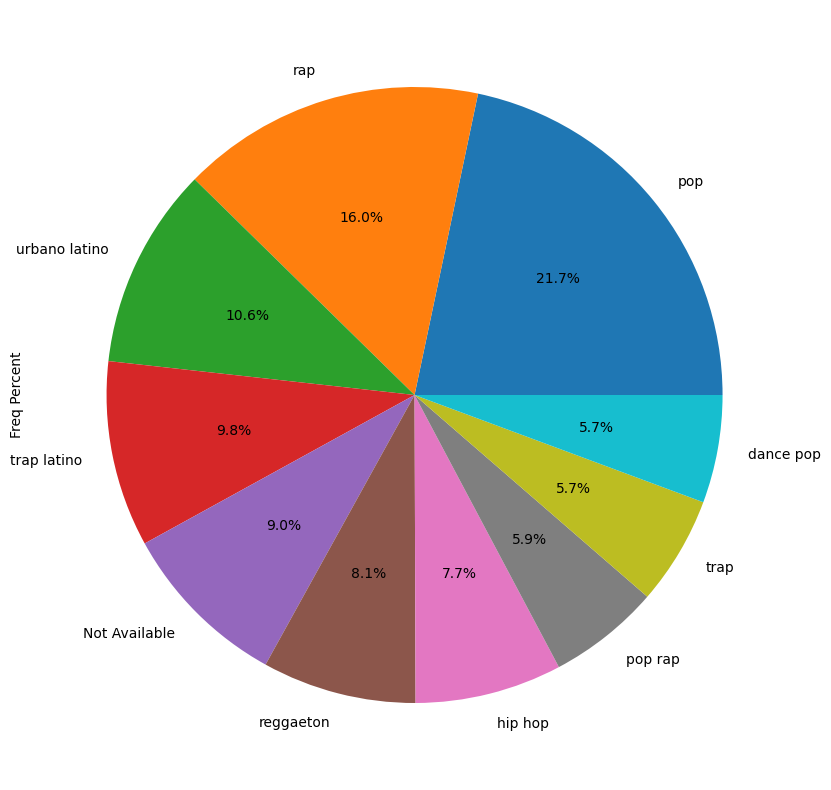

In [73]:
# top_10 = [
#     'pop',
#     'rap',
#     'urbano latino',
#     'trap latino',
#     'Not Available',
#     'reggaeton',
#     'hip hop',
#     'pop rap',
#     'trap',
#     'dance pop'
# ]

df10.plot(kind = 'pie', y = 'Freq Percent', labels=df10['Genre'], autopct='%1.1f%%', figsize=(20, 10), legend=False)
plt.show()

In [48]:
for (idx, val) in enumerate(df['Artist Genre']):
    if val == 'Not Available': print(df['Track'][idx])

i like the way you kiss me
Danza Kuduro - Cover
The Door
Danza Kuduro - Cover
Future
Beat Automotivo Tan Tan Tan Viral
Danza Kuduro - Cover
Water
Lose Control
Danza Kuduro - Cover
Panda Basi
Danza Kuduro - Cover
Babba
The Way We Move - Extended Mix
Pedro
Aesthetic
Hands
Losing Interest - Original Mix
Looking Like a Wow End of Year 2023
Casca de Bala
Back
ýýýýýýýýýýýýýýýýýýýýý
Again
Milf Song
Lil Somethin Somethin
Voz Emplumada del Monte
Si No Estï¿½
Praise Jah In The Moonlight
Dog's Plan
Yummy Fruits and Vegetables
Danza Kuduro - Cover
Austin
Commando
Mwaki
Bad idea
Stumblin' In
Beggin'
act ii: date @ 8
MASHA ULTRAFUNK
Faded
ýýýýýýýýýý ýýýýýýýýýýýý
Sabka Malik Ek
Scared To Start
Fall Back
Chill Vibes
Cari Mama Muda (Senorita Joven) - Original Mix
Cuando Te Amï¿
Close
DIME QUE
Broccoli
I WANNA BE YOUR SLAVE
Cute
MR. TAKE YA B*TCH (FEAT. CHRISEANROCK)
The 5th Letter
Tiryakinim
BON
act ii: date @ 8 (remix)
Europapa
Papa
Memory Reboot
Abrarï¿½ï¿½ï¿½s Entry | Jamal Kudu "ANIMAL")
Karma
6 In